In [1]:
from src.environment_tennis import EnvironmentTennis, episode
from src.agent import Agent
import numpy as np
import matplotlib.pyplot as plt

N_EPISODES = 10000
T_MAX = 10000
SOLVED = 0.5

In [2]:
def train_MADDPG(n_episodes=N_EPISODES):
    running_scores = []
    running_scores_avg = []
    max_avg = 0.0
    for i in range(n_episodes):
        scores = episode(env, agent, train_mode=True, rnd=len(running_scores) < 100, t_max=T_MAX)
        running_scores += [scores.max()]
        running_scores_avg += [np.mean(running_scores[-100:])]

        if running_scores_avg[-1] > max_avg:
            max_avg = running_scores_avg[-1]
            agent.save_weights()

        if (i + 1) % 100 == 0:
            print(f"episode: {i+1}, last 100 avg score: {running_scores_avg[-1]}")

        if running_scores_avg[-1] >= SOLVED:
            print(f"solved on episode {i+1}, solved avg score: {running_scores_avg[-1]}")
            break

    return running_scores, running_scores_avg

In [3]:
env = EnvironmentTennis(no_graphics=True, seed=1)
agent = Agent(s_dim=env.state_size, a_dim=env.action_size, n_agents=env.num_agents)
agent.load_weights()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


episode: 100, last 100 avg score: 0.02040000032633543
episode: 200, last 100 avg score: 0.026200000420212744
episode: 300, last 100 avg score: 0.0
episode: 400, last 100 avg score: 0.04350000070407987
episode: 500, last 100 avg score: 0.11430000180378556
episode: 600, last 100 avg score: 0.38620000578463076
solved on episode 637, solved avg score: 0.505200007557869


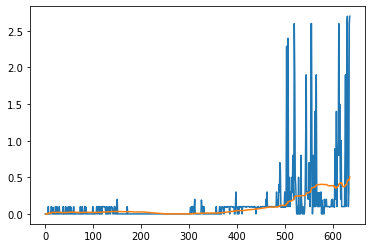

In [4]:
running_scores, running_scores_avg = train_MADDPG()

plt.plot(running_scores)
plt.plot(running_scores_avg)
plt.show()

In [5]:
env.close()